In [1]:


# Notwendige Bibliotheken importieren
import yfinance as yf         # Bibliothek für Yahoo Finance Daten4
import pandas as pd          # Datenanalyse und -bearbeitung5
import matplotlib.pyplot as plt  # Visualisierung
from datetime import datetime   # Datum und Uhrzeit-Funktionen

# Hinweis: yfinance stellt kostenlos historische Marktdaten über Yahoo Finance bereit67.

In [2]:
# Zeitpunkt berechnen: heute und vor 6 Monaten
heute = pd.Timestamp.today()                 # aktuelles Datum und Uhrzeit
start_date = heute - pd.DateOffset(months=6) # genau 6 Monate zurück
start_str = start_date.strftime("%Y-%m-%d")  # Formatieren als "YYYY-MM-DD"
end_str = heute.strftime("%Y-%m-%d")

print(f"Zeitraum: {start_str} bis {end_str}")

Zeitraum: 2025-05-19 bis 2025-11-19


In [3]:
# Historische Kursdaten abrufen
# Wir laden die täglichen Schlusskurse (Close) der letzten 6 Monate
ticker_nvda = "NVDA"
ticker_tsla = "TSLA"

# Daten für NVDA herunterladen (OHLCV: Open, High, Low, Close, Volume)
df_nvda = yf.download(ticker_nvda,
                      start=start_str,
                      end=end_str,
                      interval="1d",
                      progress=False)

# Daten für TSLA herunterladen
df_tsla = yf.download(ticker_tsla,
                      start=start_str,
                      end=end_str,
                      interval="1d",
                      progress=False)

# Überprüfung: Zeige jeweils die ersten Zeilen
print(df_nvda.head(3))
print(df_tsla.head(3))


C:\Users\Giuseppe\AppData\Local\Temp\ipykernel_19412\2155441030.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_nvda = yf.download(ticker_nvda,
C:\Users\Giuseppe\AppData\Local\Temp\ipykernel_19412\2155441030.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_tsla = yf.download(ticker_tsla,


Price            Close        High         Low        Open     Volume
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA
Date                                                                 
2025-05-19  135.552948  135.852898  132.373340  132.373340  193154600
2025-05-20  134.363083  134.563055  132.603295  134.273083  161514200
2025-05-21  131.783417  137.382703  130.573562  133.043253  270608700
Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2025-05-19  342.089996  343.000000  333.369995  336.299988   88869900
2025-05-20  343.820007  354.989990  341.630005  347.869995  131715500
2025-05-21  334.619995  347.350006  332.200012  344.429993  102354800


In [4]:


# Voraussetzung: start_str und end_str sind definiert, z.B.
# start_str = "2025-05-01"
# end_str   = "2025-11-18"

tickers = ["ASML", "META", "AMZN"]

# Dic für schnellen Zugriff per Ticker-String
data = {}

for t in tickers:
    print(f"\nLade {t} ...")
    df = yf.download(t, start=start_str, end=end_str, interval="1d", progress=False)
    data[t] = df

    # Erzeuge eine Notebook-Variable wie df_asml, df_meta, df_amzn
    # (ersetze unzulässige Zeichen falls nötig)
    safe_name = t.lower().replace("-", "_")
    var_name = f"df_{safe_name}"
    globals()[var_name] = df  # fügt die Variable in den globalen Namespace ein

    # Dateinamen erzeugen
    csv_name = f"{t}_6monatealles.csv"
    json_name = f"{t}_6monatealles.json"

    # CSV speichern (inkl. Index -> Datum bleibt als Index in CSV)
    try:
        df.to_csv(csv_name, index=True)
        print(f"CSV gespeichert: {csv_name}")
    except Exception as e:
        print(f"Fehler beim Speichern der CSV für {t}: {e}")

    # JSON speichern: Datum als Spalte (ISO-Format)
    try:
        if df.index.name is None:
            df.index.name = "Date"
        df_reset = df.reset_index()
        df_reset.to_json(json_name, orient="records", date_format="iso")
        print(f"JSON gespeichert: {json_name}")
    except Exception as e:
        print(f"Fehler beim Speichern der JSON für {t}: {e}")

# Bestätigung, welche Variablen erstellt wurden
created = [f"df_{t.lower().replace('-', '_')}" for t in tickers]
print("\nErstellte DataFrame-Variablen im Notebook:")
print(", ".join(created))





Lade ASML ...


C:\Users\Giuseppe\AppData\Local\Temp\ipykernel_19412\2961932643.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(t, start=start_str, end=end_str, interval="1d", progress=False)


CSV gespeichert: ASML_6monatealles.csv
JSON gespeichert: ASML_6monatealles.json

Lade META ...


C:\Users\Giuseppe\AppData\Local\Temp\ipykernel_19412\2961932643.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(t, start=start_str, end=end_str, interval="1d", progress=False)


CSV gespeichert: META_6monatealles.csv
JSON gespeichert: META_6monatealles.json

Lade AMZN ...


C:\Users\Giuseppe\AppData\Local\Temp\ipykernel_19412\2961932643.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(t, start=start_str, end=end_str, interval="1d", progress=False)


CSV gespeichert: AMZN_6monatealles.csv
JSON gespeichert: AMZN_6monatealles.json

Erstellte DataFrame-Variablen im Notebook:
df_asml, df_meta, df_amzn


In [5]:
# (Optional) Daten exportieren
# Als CSV-Dateien speichern
df_nvda.to_csv("NVDA_6monatealles.csv", index=True)
df_tsla.to_csv("TSLA_6monatealles.csv", index=True)

# Als JSON-Dateien speichern (Datum im ISO-Format)
df_nvda.to_json("NVDA_6monatealles.json", orient="records", date_format="iso")
df_tsla.to_json("TSLA_6monatealles.json", orient="records", date_format="iso")


In [6]:
# Nur die Schlusskurse behalten und Spalte umbenennen
df_nvda = df_nvda[["Close"]].rename(columns={"Close": "Schlusskurs"})
df_tsla = df_tsla[["Close"]].rename(columns={"Close": "Schlusskurs"})
df_amzn = df_amzn[["Close"]].rename(columns={"Close": "Schlusskurs"})
df_asml = df_asml[["Close"]].rename(columns={"Close": "Schlusskurs"})
df_meta = df_meta[["Close"]].rename(columns={"Close": "Schlusskurs"})

# Datumsindex umbenennen (optional, für Klarheit)
df_nvda.index.name = "Datum"
df_tsla.index.name = "Datum"
df_amzn.index.name = "Datum"
df_asml.index.name = "Datum"
df_meta.index.name = "Datum"

# Ausgabe der bereinigten DataFrames
display(df_nvda.head(3))
display(df_tsla.head(3))
display(df_amzn.head(3))
display(df_asml.head(3))
display(df_meta.head(3))

Price,Schlusskurs
Ticker,NVDA
Datum,
2025-05-19,135.552948
2025-05-20,134.363083
2025-05-21,131.783417


Price,Schlusskurs
Ticker,TSLA
Datum,
2025-05-19,342.089996
2025-05-20,343.820007
2025-05-21,334.619995


Price,Schlusskurs
Ticker,AMZN
Datum,
2025-05-19,206.160004
2025-05-20,204.070007
2025-05-21,201.119995


Price,Schlusskurs
Ticker,ASML
Datum,
2025-05-19,745.911194
2025-05-20,745.542847
2025-05-21,734.002563


Price,Schlusskurs
Ticker,META
Datum,
2025-05-19,639.505981
2025-05-20,636.180786
2025-05-21,634.583069


In [7]:
# (Optional) Daten exportieren
# Als CSV-Dateien speichern
df_nvda.to_csv("NVDA_schlusskurse.csv", index=True)
df_tsla.to_csv("TSLA_schlusskurse.csv", index=True)
df_amzn.to_csv("Amzn_schlusskurse.csv", index=True)
df_asml.to_csv("Asml_schlusskurse.csv", index=True)
df_meta.to_csv("Meta_schlusskurse.csv", index=True)


# Als JSON-Dateien speichern (Datum im ISO-Format)
df_nvda.to_json("NVDA_schlusskurse.json", orient="records", date_format="iso")
df_tsla.to_json("TSLA_schlusskurse.json", orient="records", date_format="iso")
df_amzn.to_json("Amzn_schlusskurse.json", orient="records", date_format="iso")
df_asml.to_json("Asml_schlusskurse.json", orient="records", date_format="iso")
df_meta.to_json("Meta_schlusskurse.json", orient="records", date_format="iso")



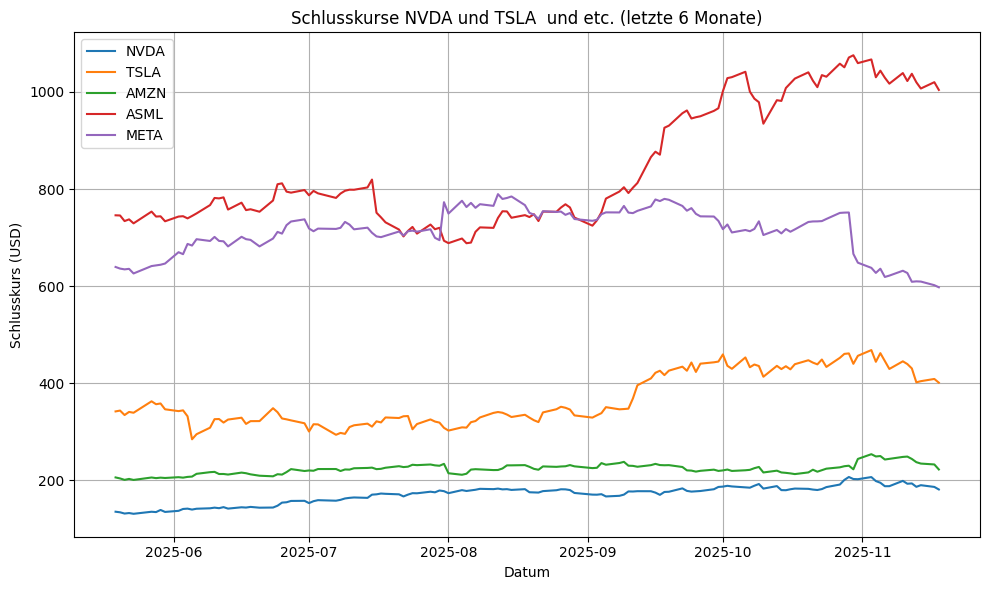

In [8]:
# (Optional) Visualisierung der Kursentwicklung
plt.figure(figsize=(10, 6))
plt.plot(df_nvda.index, df_nvda["Schlusskurs"], label="NVDA")
plt.plot(df_tsla.index, df_tsla["Schlusskurs"], label="TSLA")
plt.plot(df_amzn.index, df_amzn["Schlusskurs"], label="AMZN")
plt.plot(df_asml.index, df_asml["Schlusskurs"], label="ASML")
plt.plot(df_meta.index, df_meta["Schlusskurs"], label="META")

plt.title("Schlusskurse NVDA und TSLA  und etc. (letzte 6 Monate)")
plt.xlabel("Datum")
plt.ylabel("Schlusskurs (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
tickers = ["ASML", "META", "AMZN", "NVDA", "TSLA"]

# 1) Alle Ticker zusammen herunterladen
df1 = yf.download(tickers=tickers, start=start_str, end=end_str, interval="1d", progress=False)
print("Download fertig. Spalten (erste 10):")
print(df1.head(3))

C:\Users\Giuseppe\AppData\Local\Temp\ipykernel_19412\2040610161.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df1 = yf.download(tickers=tickers, start=start_str, end=end_str, interval="1d", progress=False)


Download fertig. Spalten (erste 10):
Price            Close                                                  \
Ticker            AMZN        ASML        META        NVDA        TSLA   
Date                                                                     
2025-05-19  206.160004  745.911194  639.505981  135.552948  342.089996   
2025-05-20  204.070007  745.542847  636.180786  134.363083  343.820007   
2025-05-21  201.119995  734.002563  634.583069  131.783417  334.619995   

Price             High                                                  ...  \
Ticker            AMZN        ASML        META        NVDA        TSLA  ...   
Date                                                                    ...   
2025-05-19  206.619995  746.777451  642.072281  135.852898  343.000000  ...   
2025-05-20  205.589996  745.761872  638.427540  134.563055  354.989990  ...   
2025-05-21  203.460007  752.542554  645.677024  137.382703  347.350006  ...   

Price             Open                     

In [10]:
df1.to_csv("allezusammen6monatealles.csv", index=True)
df1.to_json("allezusammen6monatealles.json", orient="records", date_format="iso")

In [11]:
df2 = df1[["Close"]].rename(columns={"Close": "Schlusskurs"})
df2.index.name = "Datum"
display(df2.head(3))



Price      Schlusskurs                                                
Ticker            AMZN        ASML        META        NVDA        TSLA
Datum                                                                 
2025-05-19  206.160004  745.911194  639.505981  135.552948  342.089996
2025-05-20  204.070007  745.542847  636.180786  134.363083  343.820007
2025-05-21  201.119995  734.002563  634.583069  131.783417  334.619995

In [12]:
df2.to_csv("allezusammen_schlusskurse.csv", index=True)


In [13]:
df2.to_json("allezusammen_schlusskurse.json", orient="records", date_format="iso")


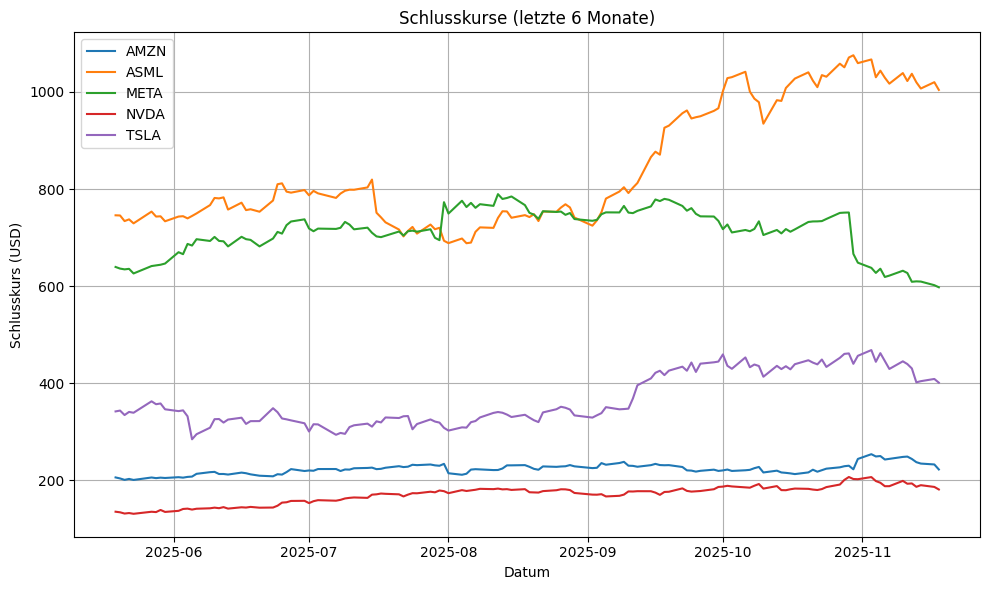

In [14]:


# df2 muss bereits im Namespace sein; falls MultiIndex, flache die Ticker-Namen
if isinstance(df2.columns, pd.MultiIndex):
    df2.columns = [c[-1] for c in df2.columns]

plt.figure(figsize=(10, 6))
for col in df2.columns:
    plt.plot(df2.index, df2[col], label=str(col))

plt.title("Schlusskurse (letzte 6 Monate)")
plt.xlabel("Datum")
plt.ylabel("Schlusskurs (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
